In [1]:
from pathlib import Path

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [30]:
def extract_character(
    image_path: Path,
    lower_blue: np.ndarray = np.array([90, 120, 180]),
    upper_blue: np.ndarray = np.array([130, 255, 255]),
    margin: int = 75,
) -> np.ndarray | None:
    image = cv2.imread(str(image_path))

    h, w, _ = image.shape
    hm, wm = h // 20, w // 4
    image = image[hm:-hm, wm:-wm]

    mask = cv2.inRange(cv2.cvtColor(image, cv2.COLOR_BGR2HSV), lower_blue, upper_blue)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        return None

    blue_box = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(blue_box)

    character_region = image[y:y + h, x:x + w]  # fmt: skip

    _, thresh = cv2.threshold(cv2.cvtColor(character_region, cv2.COLOR_BGR2GRAY), 240, 255, cv2.THRESH_BINARY_INV)
    char_contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not char_contours:
        return None

    character = max(char_contours, key=cv2.contourArea)
    x2, y2, w2, h2 = cv2.boundingRect(character)

    final_character = character_region[y2:y2 + h2, x2:x2 + w2]  # fmt: skip

    return final_character[margin:-margin, margin:-margin]

In [33]:
paths = sorted(Path('tests').glob('*.png'))
len(paths)

41

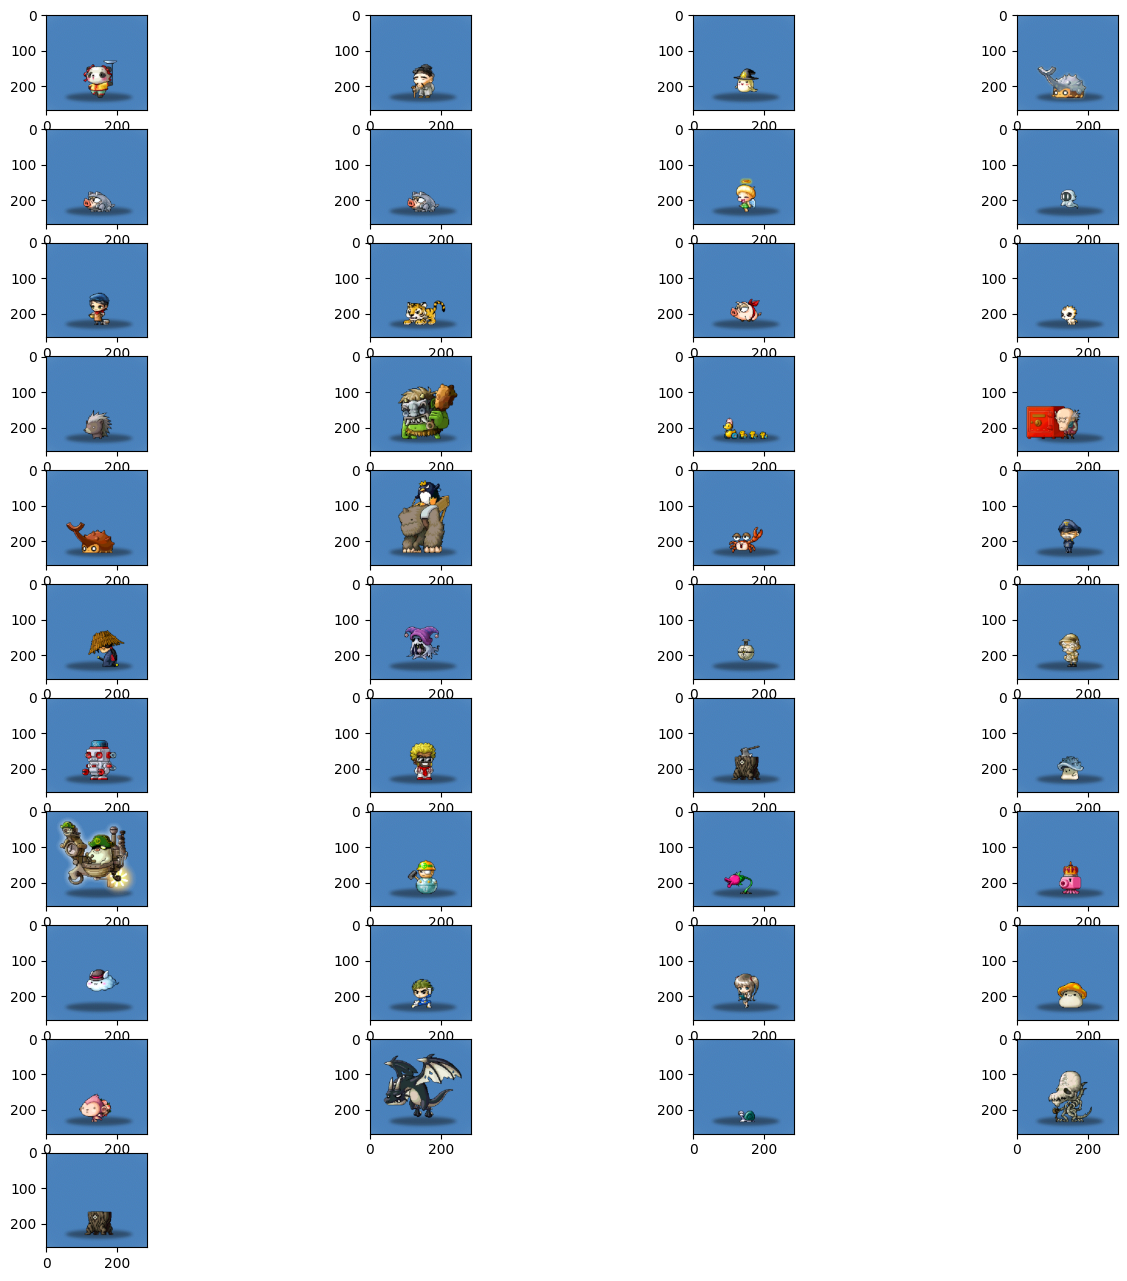

In [37]:
w = 10
h = 10

fig = plt.figure(figsize=(16, 16))

columns = 4
rows = 11
for i in range(1, min(columns * rows, len(paths)) + 1):
    img = extract_character(paths[i - 1])[..., ::-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

plt.show()

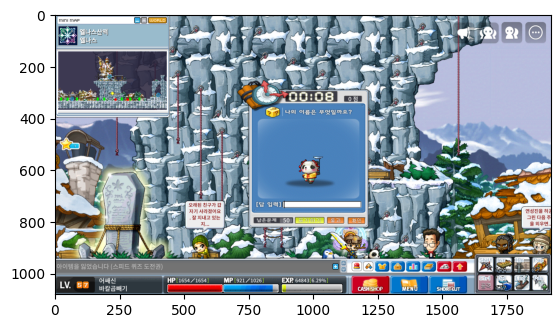

In [45]:
plt.imshow(cv2.imread(paths[0])[..., ::-1])

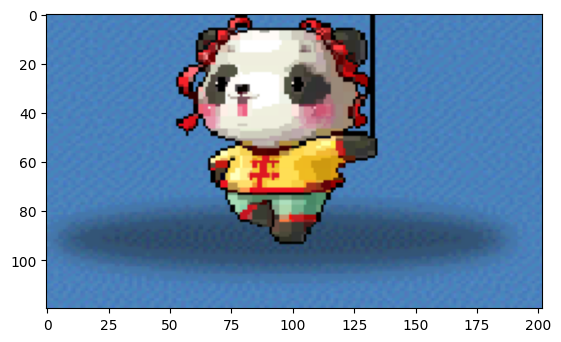

In [46]:
plt.imshow(character)